In [17]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer # lemmatizer
from nltk.corpus import stopwords # stopword remover
from nltk import word_tokenize # tokenize for stopword removal
nltk.download('stopwords') # library of stopwords
stop_words = stopwords.words('english') # setting stopwords to english.
from collections import Counter # to count the words
from gensim.utils import simple_preprocess # temporary vectorizing
nltk.download('punkt') # tokenization model we use it for stopwords removal and lemma.
nltk.download('averaged_perceptron_tagger') # nltk.postager needs this library.
nltk.download('wordnet') # aditional library for better lematization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
gdown.download(id = '1C0CxMG0TqH9clyxAtGvpkTtUP4jD_FLx')
df = pd.read_csv('/content/df_compleate.csv')

Downloading...
From: https://drive.google.com/uc?id=1C0CxMG0TqH9clyxAtGvpkTtUP4jD_FLx
To: /content/df_compleate.csv
100%|██████████| 38.7M/38.7M [00:00<00:00, 100MB/s] 


In [20]:
df['bad/good'].value_counts()
# 3lakhs data is of badwords and 2lakhs is of good words.
# we do not see a drastic difference like morethan 70 percent.
# its a good to go.

1    312959
0    265821
Name: bad/good, dtype: int64

In [21]:
df.isnull().sum()
# we will drop them.

text        2
bad/good    0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df['text'] = [i.lower() for i in df['text']]
df['text'] = df['text'].str.replace("[^a-zA-Z0-9]", " ") 
# removing punctuvations and turning the text to lowercase.

### lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer() # initilize

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # tagging parts of speech

    lemmatized_sentence = []
    
    for word, tag in nltk_tagged: 
        if tag is None: # certain words do not have tag.
            lemmatized_sentence.append(word)
        else:
          try:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag)) # if tag is present we are lemmatizing and appending.
          except:           # sometimes even lemmatizer dosenot have the tag of original word.
            lemmatized_sentence.append(word) 

    return " ".join(lemmatized_sentence) # original form of word is returned

In [ ]:
df['text'] = df['text'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df.to_csv('df_lemmatized.csv', index=False)

### Stopword removal

In [24]:
gdown.download(id = '1R3fPsxw9MGgCX6eRgP-qzfD7j5jcSocZ')
df = pd.read_csv('/content/df_lemmatized.csv')

Downloading...
From: https://drive.google.com/uc?id=1R3fPsxw9MGgCX6eRgP-qzfD7j5jcSocZ
To: /content/df_lemmatized.csv
100%|██████████| 37.7M/37.7M [00:00<00:00, 187MB/s]


In [25]:
df.shape

(578778, 2)

In [26]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(578411, 2)

In [27]:
def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)     
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [28]:
df['text'] = [remove_stopwords(str(r)) for r in df['text']]

In [29]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(576776, 2)

### Word Cloud

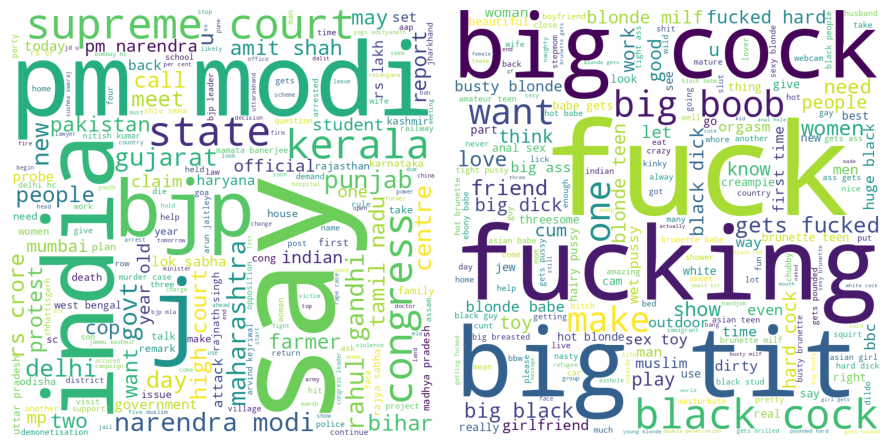

In [30]:
d = list(df['bad/good'].unique())
plt.figure(figsize = (9, 9), facecolor = None) 
for i in range(len(d)):
  word_cloud_df = df.loc[df['bad/good'] == d[i],:]
  all_words = ' '.join([text for text in word_cloud_df['text']])
  

  wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 10).generate(all_words)

  plt.subplot(2,2,i+1)
  plt.imshow(wordcloud) 
  plt.axis("off") 
plt.tight_layout() 
plt.show()

In [31]:
df.to_csv('df_cleaned.csv', index=False)

### Finding optimal max features and vectorizing.

In [ ]:
gdown.download(id = '1_icy7eb0kLsKgnVoFlIU5aTdqzn7k5jG')
df = pd.read_csv('/content/df_cleaned.csv')

Downloading...
From: https://drive.google.com/uc?id=1_icy7eb0kLsKgnVoFlIU5aTdqzn7k5jG
To: /content/df_cleaned.csv
100%|██████████| 31.0M/31.0M [00:00<00:00, 44.4MB/s]


#### Finding optimal max words for tokenizing.

In [ ]:
preprocessed_data = [simple_preprocess(str(sentence)) for sentence in df['text']]

token_counts = Counter(token for sentence in preprocessed_data for token in sentence)

vocabulary_size = len(token_counts)
print(vocabulary_size)

90819


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df['text'] = [str(i).lower() for i in df['text']]
df['text'] = df['text'].str.replace("[^a-zA-Z0-9]", " ") 

<ipython-input-6-aa1d4860d214>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
texts = df['text'].to_list()

max_words = 90819
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

#### pad_seq length plan

In [ ]:
subset_size = 500000  
subset_sequences = sequences[100000:subset_size]

sequence_lengths = [len(seq) for seq in subset_sequences]

print("Minimum sequence length:", min(sequence_lengths))
print("Maximum sequence length:", max(sequence_lengths))
print("Average sequence length:", sum(sequence_lengths) / len(sequence_lengths))

Minimum sequence length: 1
Maximum sequence length: 29
Average sequence length: 7.60865


#### Padded Sequence

In [ ]:
max_sequence_length = 15 # based on pad_seq length sugestion
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Printing to check sequences
example_index = 3

example_text = texts[example_index]
example_sequence = sequences[example_index]
example_pad_sequence = padded_sequences[example_index]

print("Text:", example_text,'\n')
print("Sequence:", example_sequence,'\n')
print("pad_Sequence:", example_pad_sequence,'\n')

Text: govt may name prosecutor 2g case friday 

Sequence: [13, 169, 754, 7343, 1321, 22, 2820] 

pad_Sequence: [   0    0    0    0    0    0    0    0   13  169  754 7343 1321   22
 2820] 



### Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['bad/good'], test_size=0.25, random_state=42)

## Model Development

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

95104


In [ ]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(6))
model.add(Dropout(0.525))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(x_test) 
y_pred_binary = (y_pred > 0.5).astype(int)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Epoch 1/100
13519/13519 [==============================] - 149s 10ms/step - loss: 0.0635 - accuracy: 0.9776 - val_loss: 0.0210 - val_accuracy: 0.9934
Epoch 2/100
13519/13519 [==============================] - 106s 8ms/step - loss: 0.0300 - accuracy: 0.9860 - val_loss: 0.0197 - val_accuracy: 0.9944
Epoch 3/100
13519/13519 [==============================] - 115s 9ms/step - loss: 0.0240 - accuracy: 0.9878 - val_loss: 0.0228 - val_accuracy: 0.9937
Epoch 4/100
13519/13519 [==============================] - 105s 8ms/step - loss: 0.0217 - accuracy: 0.9883 - val_loss: 0.0247 - val_accuracy: 0.9936
Epoch 5/100
4507/4507 [==============================] - 9s 2ms/step
Precision: 0.9929637826704364
Recall: 0.9966486042271244
F1-score: 0.9948027812489987


In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the trained model
model.save('model.h5')